# Лабораторная работа №3

ФИО: Калинин Егор Андреевич
Группа: БИВТ-21-3

## Задание:

1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (**если у вас многоклассовая классификация, прочтите P.S.S. внизу**).
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Обучить на тренировочном множестве:
     1. Линейную модель (`LogisticRegression`, `LinearRegression`)
     2. Деревянную модель (`DecisionTreeClassifier`, `DecisionTreeRegressor`) (тут советую попробовать разные глубины деревьев)
     3. K-ближайших соседей (`KNeighborsClassifier`, `KNeighborsRegressor`) (тут тоже есть смысл попробовать разные `k`)
     4. Случайный лес (`RandomForestClassifier`, `RandomForestRegressor`) 
5. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score
     2. Для задачи регрессии -- MAE, RMSE, MAPE
6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

## 1. Пример импорта данных. Грузим данные

In [3]:
import pandas as pd
data = pd.read_csv("exams.csv", sep=',') 
print(data.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [4]:
column_name = 'test preparation course'
index = data.columns.get_loc(column_name)
print(f"Индекс столбца test preparation course - {index}")

Индекс столбца test preparation course - 4


## 2. Понимаем, какая перед нами задача

Цель:

Целью данной лабораторной работы является изучение и применение основных методов предобработки данных, обучения моделей машинного обучения 
и оценки их производительности. 

Тип задачи:

В данном случае задача регрессии, поскольку итоговая оценка ученика по предмету(G3), 
является непрерывной числовой переменной, а не категориальной.

## 3. Делаем предобработку данных

In [13]:
# Разделение данных на тренировочную и тестовую выборки

train = data[int(len(data)*0.8):]  # 80% 
test = data[:int(len(data)*0.2)] # 20%

In [41]:
#from sklearn.model_selection import train_test_split as TrainTest
#train, test = TrainTest(data, test_size=0.2, random_state=42)

Описание шага выше:
train_test_split - это функция из библиотеки sklearn.model_selection, которая разделяет исходный набор данных на две части: тренировочную и тестовую.
test_size = 0.2 - это параметр, который определяет долю исходного набора данных, которая будет использоваться для тестового набора. В данном случае, 20% (0.2) исходных данных будут использованы для тестового набора, а остальные 80% - для тренировочного.
random_state = 42 - это параметр, который обеспечивает воспроизводимость разделения. Если запустить эту строку кода несколько раз с тем же значением, получим одно и то же разделение данных. Используется для сравнения результатов различных моделей на одних и тех же наборах данных.

In [37]:
# Проверка пропусков в данных
print(train.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


Описание шага выше: Пропуски отсутствуют.

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Определение численных и категориальных столбцов
num_cols = ['math score', 'reading score', 'writing score']
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Создание преобразователя колонок
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), num_cols), ('cat', OneHotEncoder(), cat_cols)])

# Применение преобразований к тренировочным и тестовым данным
train_preprocessed = preprocessor.fit_transform(train)
test_preprocessed = preprocessor.transform(test)

print("Данные до преобразования:")
print(train.head())

# Преобразование в DataFrame (это не обязательно, но может быть полезно для дальнейшего анализа)
train_preprocessed_df = pd.DataFrame(train_preprocessed)
test_preprocessed_df = pd.DataFrame(test_preprocessed)

# Вывод преобразованных данных
print("\nРазделение по группам:")
print(preprocessor.get_feature_names_out(), "\n\n")
print("\nПреобразованные данные:")
print(train_preprocessed_df.head())

Данные до преобразования:
     gender race/ethnicity parental level of education     lunch  \
800    male        group D                 high school  standard   
801  female        group C            some high school  standard   
802  female        group B                some college  standard   
803    male        group A                some college  standard   
804    male        group C                 high school  standard   

    test preparation course  math score  reading score  writing score  
800               completed          79             84             80  
801                    none          44             65             63  
802               completed          69             94             87  
803                    none          53             48             48  
804                    none          74             69             61  

Разделение по группам:
['num__math score' 'num__reading score' 'num__writing score'
 'cat__gender_female' 'cat__gender_male' 'cat__r

## 4. Обучаем на тренировочном множестве

In [39]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import numpy as np

x = np.delete(train_preprocessed, len(num_cols) - 1, axis=1) # все столбцы, кроме test preparation course
y = train_preprocessed[:, len(num_cols) - 1] # только test preparation course

# Линейные модели
linear_model = LinearRegression()
linear_model.fit(x, y)
print("LinearRegression - Выполнено")

# Деревянные модели
tree_regressor = DecisionTreeRegressor(max_depth=3)  
tree_regressor.fit(x, y)
print("DecisionTreeRegressor - Выполнено")

# K-ближайших соседей
knn_regressor = KNeighborsRegressor(n_neighbors=3) 
knn_regressor.fit(x, y)
print("KNeighborsRegressor - Выполнено")

# Случайный лес
random_forest_regressor = RandomForestRegressor(n_estimators=100)
random_forest_regressor.fit(x, y)
print("RandomForestRegressor - Выполнено")

LinearRegression - Выполнено
DecisionTreeRegressor - Выполнено
KNeighborsRegressor - Выполнено
RandomForestRegressor - Выполнено


## 5. Подсчет метрик на train и test множествах


Расчет метрик на тренировочных данных:

LinearRegression - MAE: 0.17600572622805202, RMSE: 0.2202945262236743, MAPE: 61.85481563300201%
DecisionTreeRegressor - MAE: 0.23771220727246173, RMSE: 0.30113224346962386, MAPE: 75.47471299798838%
KNeighborsRegressor - MAE: 0.23074370039204933, RMSE: 0.28596793816149035, MAPE: 77.57062971754425%
RandomForestRegressor - MAE: 0.08807941954347719, RMSE: 0.11021384115861903, MAPE: 24.671752774846404%

Расчет метрик на тестовых данных:

LinearRegression - MAE: 0.17967534809093244, RMSE: 0.21922243112411097, MAPE: 66.51675794366354%
DecisionTreeRegressor - MAE: 0.28479150911297224, RMSE: 0.3526320255874143, MAPE: 109.98625414450322%
KNeighborsRegressor - MAE: 0.277330908309684, RMSE: 0.3487680245177363, MAPE: 109.51944951887809%
RandomForestRegressor - MAE: 0.2246676323099917, RMSE: 0.2780595455812755, MAPE: 83.33569784848243%


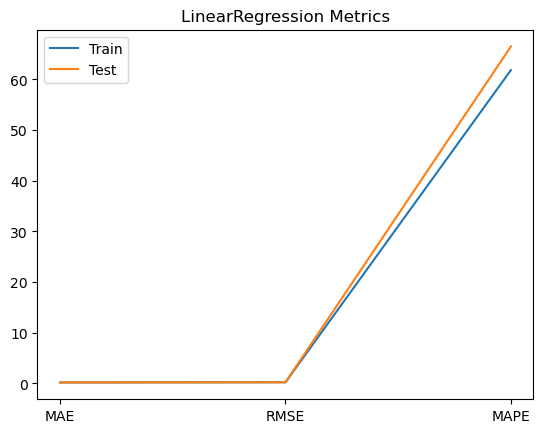

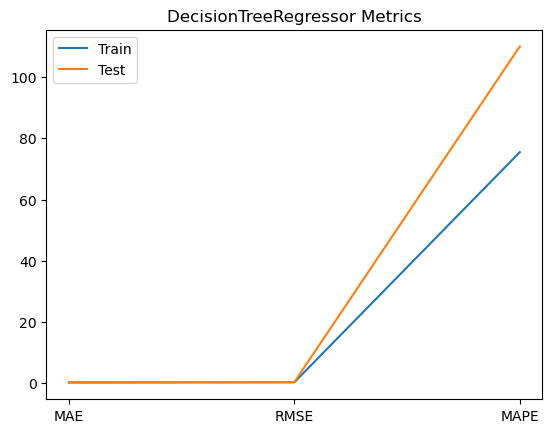

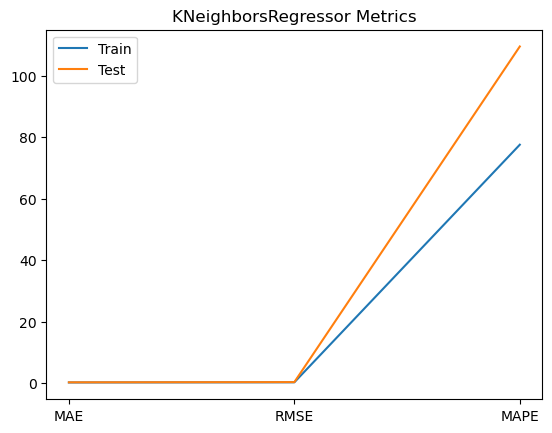

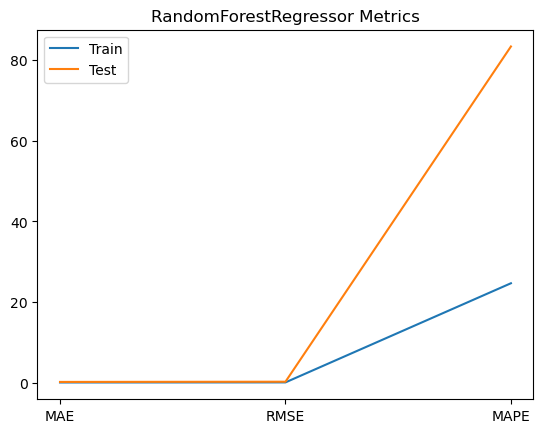

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np

x_test = np.delete(test_preprocessed, len(num_cols) - 1, axis=1) # все столбцы, кроме test preparation course
y_test = test_preprocessed[:, len(num_cols) - 1] # только test preparation course

# Предсказания моделей
y_pred_linear = linear_model.predict(x)
y_pred_tree = tree_regressor.predict(x)
y_pred_knn = knn_regressor.predict(x)
y_pred_rf = random_forest_regressor.predict(x)

y_pred_linear_test = linear_model.predict(x_test)
y_pred_tree_test = tree_regressor.predict(x_test)
y_pred_knn_test = knn_regressor.predict(x_test)
y_pred_rf_test = random_forest_regressor.predict(x_test)

# Функция для расчета MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("\nРасчет метрик на тренировочных данных:\n")

models = {'LinearRegression': y_pred_linear, 'DecisionTreeRegressor': y_pred_tree, 'KNeighborsRegressor': y_pred_knn, 'RandomForestRegressor': y_pred_rf}
metrics_train = {}
for model_name, y_pred in models.items():
    mae = mean_absolute_error(y, y_pred)
    rmse = sqrt(mean_squared_error(y, y_pred))
    mape = mean_absolute_percentage_error(y, y_pred)
    metrics_train[model_name] = [mae, rmse, mape]
    print(f"{model_name} - MAE: {mae}, RMSE: {rmse}, MAPE: {mape}%")

print("\nРасчет метрик на тестовых данных:\n")

models_test = {'LinearRegression': y_pred_linear_test, 'DecisionTreeRegressor': y_pred_tree_test, 'KNeighborsRegressor': y_pred_knn_test, 'RandomForestRegressor': y_pred_rf_test}
metrics_test = {}
for model_name, y_pred in models_test.items():
    mae_test = mean_absolute_error(y_test, y_pred)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred))
    mape_test = mean_absolute_percentage_error(y_test, y_pred)
    metrics_test[model_name] = [mae_test, rmse_test, mape_test]
    print(f"{model_name} - MAE: {mae_test}, RMSE: {rmse_test}, MAPE: {mape_test}%")

# Функция для построения графиков
def plot_metrics(model_name, train_metrics, test_metrics):
    fig, ax = plt.subplots()
    ax.plot(['MAE', 'RMSE', 'MAPE'], train_metrics, label='Train')
    ax.plot(['MAE', 'RMSE', 'MAPE'], test_metrics, label='Test')
    ax.legend()
    plt.title(f'{model_name} Metrics')
    plt.show()

# Построение графиков
for model_name in models.keys():
    plot_metrics(model_name, metrics_train[model_name], metrics_test[model_name])

## 6. Сравнение метрик

1.Какая модель справилась лучше с поставленной задачей? 
На основании метрик, лучшей моделью является RandomForestRegressor:

На тренировочных данных: MAE = 0.088, RMSE = 0.110, MAPE = 24.67%
На тестовых данных: MAE = 0.225, RMSE = 0.278, MAPE = 83.34%
Эти метрики значительно лучше, чем у других моделей, особенно на тренировочных данных.
2.Имеет ли место переобучениеПереобучение (overfitting) происходит, когда модель демонстрирует отличные результаты на тренировочных данных, но плохо работает на тестовых. Признаки переобучения можно наблюдать у DecisionTreeRegressor и RandomForestRegressor:

DecisionTreeRegressor: Значительное ухудшение метрик на тестовых данных по сравнению с тренировочными данными.

MAE увеличивается с 0.238 до 0.285.
RMSE увеличивается с 0.301 до 0.353.
MAPE увеличивается с 75.47% до 109.99%.
RandomForestRegressor: Хотя метрики на тестовых данных хуже, чем на тренировочных, они все еще лучшие среди всех моделей, но разница между метриками на тренировочных и тестовых данных указывает на некоторое переобучение.

MAE увеличивается с 0.088 до 0.225.
RMSE увеличивается с 0.110 до 0.278.
MAPE увеличивается с 24.67% до 83.34%.ных.

3.Имеет ли место нНедообучение (underfitting) происходит, когда модель плохо работает как на тренировочных, так и на тестовых данных. LinearRegression и KNeighborsRegressor показывают признаки недообучения:

LinearRegression:

MAE на тестовых данных (0.180) немного выше, чем на тренировочных данных (0.176).
RMSE практически одинаков на обоих наборах данных (~0.220).
MAPE увеличивается с 61.85% до 66.52%.
KNeighborsRegressor:

MAE на тестовых данных (0.277) немного выше, чем на тренировочных данных (0.231).
RMSE увеличивается с 0.286 до 0.349.
MAPE увеличивается с 77.57% до 109.52%.
Обе модели показывают умеренные результаты и на тренировочных, и на тестовых данных, что говорит о том, что они недостаточно хорошо подстраиваются под данные.не наблюдается.

4.Как можно улучшить метрики моделей? 

Есть несколько способов улучшить метрики моделей:
Настройка гиперпараметров: Можно использовать методы, такие как Grid Search или Random Search, для оптимизации гиперпараметров модели.
Работа с данными: Можно попробовать различные методы предобработки данных, такие как удаление выбросов, преобразование признаков или добавление новых признаков.
Использование других моделей: В зависимости от задачи, другие модели машинного обучения могут показать лучшую производительность.
Увеличение объема данных: Если возможно, можно попробовать собрать больше данных для обучения модели. Это может помочь улучшить обобщающую способность модели.



